# 2023-2 언어데이터과학 24강 (2023-11-29) 실습 (2) Word2Vec 단어 벡터 시각화

## 0. 준비

### Source Hans Sans K 글꼴 설치하기

In [2]:
!sudo wget https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/OTF/Korean/SourceHanSansK-Regular.otf -O /usr/share/fonts/SourceHanSansK-Regular.otf
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

--2023-11-29 00:59:20--  https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/OTF/Korean/SourceHanSansK-Regular.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16433304 (16M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/SourceHanSansK-Regular.otf’

/usr/share/fonts/So 100%[===================>]  15.67M  --.-KB/s    in 0.06s   

2023-11-29 00:59:20 (255 MB/s) - ‘/usr/share/fonts/SourceHanSansK-Regular.otf’ saved [16433304/16433304]

/usr/share/fonts: caching, new cache contents: 1 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/NanumGothicCoding: caching, new cache contents: 2 fonts, 1 dirs
/usr/share/fonts/truetype/NanumGothicCoding/__MACOSX: caching, new cache co

### Python 모듈 설치하기

In [3]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


## 1. Word2Vec 벡터 모델

In [4]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns

### 기존 모델 로드하기

In [5]:
MODEL_PATH = '../models/word2vec-modu-online'

model = Word2Vec.load(MODEL_PATH)

### 예시: 정도부사 분류하기

In [6]:
mags = ['아주', '완전', '완전히', '무척', '상당히', '매우', '굉장히', '조금']
model.wv.doesnt_match(mags)

'조금'

In [7]:
model.wv.most_similar(['조금'])

[('좀', 0.8069116473197937),
 ('살짝', 0.7481656074523926),
 ('쫌', 0.737105667591095),
 ('좀더', 0.6478176116943359),
 ('조금만', 0.6458689570426941),
 ('쪼금', 0.6046179533004761),
 ('한참', 0.5960975289344788),
 ('좀만', 0.5876703858375549),
 ('꽤', 0.5810901522636414),
 ('점점', 0.5737908482551575)]

In [8]:
words = ['아주', '완전', '무척', '매우', '굉장히', '조금', '좀', '살짝', '쫌', '쪼금']

In [9]:
matrix = pd.DataFrame() # EDIT THIS LINE
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.089436,-0.234684,-0.003570,-0.123261,0.286911,0.469915,0.058658,0.265672,0.434451,-0.288804,...,-0.054897,-0.170338,0.002701,0.217411,-0.170767,0.259355,-0.565977,-0.505283,-0.250359,0.050778
1,-0.033549,0.331441,-0.038656,0.486014,0.559856,-0.258373,0.643656,-0.198958,-0.048559,-0.884977,...,-0.321978,-0.387672,0.213656,0.700408,-0.308882,0.033818,-0.197248,-0.816969,-0.457166,0.021352
2,-0.073628,0.010606,-0.030907,0.237016,0.031268,0.068983,0.182368,0.512762,0.071434,-0.213098,...,0.185007,-0.092287,0.109936,0.279620,0.125705,0.177310,-0.069918,-0.361966,-0.176300,-0.089101
3,-0.107544,-0.412183,0.178870,0.192393,0.154422,0.251676,0.000947,0.435573,0.242177,-0.065178,...,0.035901,0.091084,-0.106948,0.321680,-0.221422,0.226501,-0.073629,-0.266394,-0.348368,-0.140988
4,-0.236848,-0.176959,0.109955,0.238909,0.042408,0.165550,0.336431,0.160697,0.181482,-0.207883,...,-0.098875,0.292525,0.438800,0.553867,0.152177,0.389239,-0.006148,-0.373997,-0.284638,-0.170770
5,-0.325245,-0.319455,0.582284,-0.203206,-0.879208,-0.499119,-0.529536,0.216222,0.187365,-0.877385,...,0.574816,0.575149,0.321377,0.869351,-0.250884,0.363344,-0.239351,-0.347992,-0.000791,0.391478
6,0.669952,-0.765542,0.097528,-0.341856,-1.476043,-1.024959,-1.175341,-0.022323,-0.000324,-0.749507,...,0.602685,0.203785,0.458947,1.749799,-0.783470,0.280695,0.230261,-0.776228,-0.082273,-0.156703
7,-0.340247,0.296311,0.615076,0.018632,-0.375321,-0.272466,0.020033,-0.306375,0.259250,-0.355453,...,0.569055,0.215328,0.505000,0.256033,-0.313868,-0.104375,-0.406323,-0.352884,-0.064465,0.353518
8,0.169408,-0.100808,-0.005245,-0.124834,-0.542665,-0.229949,-0.101115,0.389571,0.275613,-0.422947,...,0.568911,-0.322475,0.006234,0.542135,-0.607804,0.251927,-0.296459,-0.578454,-0.161818,-0.086829
9,0.072246,0.300020,0.026928,-0.121510,-0.165417,-0.106609,0.084913,0.248565,-0.090033,-0.263931,...,0.388924,0.046829,0.006922,0.012887,-0.072289,0.071216,0.024182,-0.059326,0.092577,0.005283


In [10]:
matrix.index = words
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
아주,0.089436,-0.234684,-0.003570,-0.123261,0.286911,0.469915,0.058658,0.265672,0.434451,-0.288804,...,-0.054897,-0.170338,0.002701,0.217411,-0.170767,0.259355,-0.565977,-0.505283,-0.250359,0.050778
완전,-0.033549,0.331441,-0.038656,0.486014,0.559856,-0.258373,0.643656,-0.198958,-0.048559,-0.884977,...,-0.321978,-0.387672,0.213656,0.700408,-0.308882,0.033818,-0.197248,-0.816969,-0.457166,0.021352
무척,-0.073628,0.010606,-0.030907,0.237016,0.031268,0.068983,0.182368,0.512762,0.071434,-0.213098,...,0.185007,-0.092287,0.109936,0.279620,0.125705,0.177310,-0.069918,-0.361966,-0.176300,-0.089101
매우,-0.107544,-0.412183,0.178870,0.192393,0.154422,0.251676,0.000947,0.435573,0.242177,-0.065178,...,0.035901,0.091084,-0.106948,0.321680,-0.221422,0.226501,-0.073629,-0.266394,-0.348368,-0.140988
굉장히,-0.236848,-0.176959,0.109955,0.238909,0.042408,0.165550,0.336431,0.160697,0.181482,-0.207883,...,-0.098875,0.292525,0.438800,0.553867,0.152177,0.389239,-0.006148,-0.373997,-0.284638,-0.170770
조금,-0.325245,-0.319455,0.582284,-0.203206,-0.879208,-0.499119,-0.529536,0.216222,0.187365,-0.877385,...,0.574816,0.575149,0.321377,0.869351,-0.250884,0.363344,-0.239351,-0.347992,-0.000791,0.391478
좀,0.669952,-0.765542,0.097528,-0.341856,-1.476043,-1.024959,-1.175341,-0.022323,-0.000324,-0.749507,...,0.602685,0.203785,0.458947,1.749799,-0.783470,0.280695,0.230261,-0.776228,-0.082273,-0.156703
살짝,-0.340247,0.296311,0.615076,0.018632,-0.375321,-0.272466,0.020033,-0.306375,0.259250,-0.355453,...,0.569055,0.215328,0.505000,0.256033,-0.313868,-0.104375,-0.406323,-0.352884,-0.064465,0.353518
쫌,0.169408,-0.100808,-0.005245,-0.124834,-0.542665,-0.229949,-0.101115,0.389571,0.275613,-0.422947,...,0.568911,-0.322475,0.006234,0.542135,-0.607804,0.251927,-0.296459,-0.578454,-0.161818,-0.086829
쪼금,0.072246,0.300020,0.026928,-0.121510,-0.165417,-0.106609,0.084913,0.248565,-0.090033,-0.263931,...,0.388924,0.046829,0.006922,0.012887,-0.072289,0.071216,0.024182,-0.059326,0.092577,0.005283


## 2. 차원 축소

100차원 벡터를 2차원으로 축소해서 좌표평면에 나타낼 수 있게 만든다.

In [11]:
tsne = TSNE(perplexity=1, random_state=174)
matrix2d = tsne.fit_transform(matrix)
matrix2d

array([[  37.4655  ,  -87.14376 ],
       [  71.96439 , -105.118065],
       [ -19.195883,  -36.812637],
       [ -10.945238,  -63.847374],
       [ -37.879192,  -99.62151 ],
       [-119.87139 ,   66.01227 ],
       [-152.81798 ,   86.2728  ],
       [ -83.00665 ,   43.672947],
       [  -8.17259 ,   47.720627],
       [ -38.897343,   20.92791 ]], dtype=float32)

In [12]:
matrix2d = pd.DataFrame(matrix2d)
matrix2d.index = words
matrix2d.columns = ['x', 'y']
matrix2d['category'] = ['aug'] * 5 + ['dim'] * 5
matrix2d

,x,y,category
아주,37.465500,-87.143761,aug
완전,71.964394,-105.118065,aug
무척,-19.195883,-36.812637,aug
매우,-10.945238,-63.847374,aug
굉장히,-37.879192,-99.621513,aug
조금,-119.871391,66.012268,dim
좀,-152.817978,86.272797,dim
살짝,-83.006653,43.672947,dim
쫌,-8.172590,47.720627,dim
쪼금,-38.897343,20.927910,dim


## 3. 시각화

### 산점도(scatterplot)

<Axes: xlabel='x', ylabel='y'>

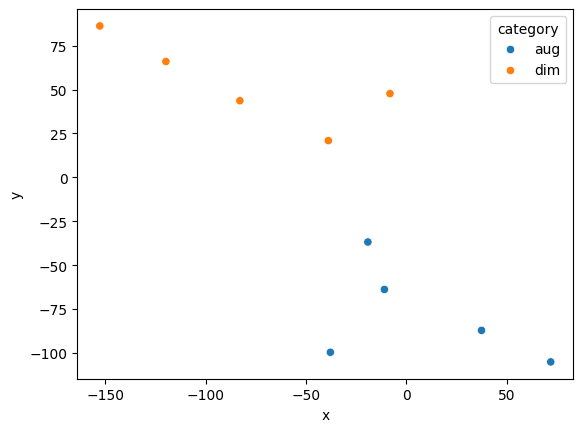

In [13]:
sns.scatterplot(x='x', y='y', data=matrix2d) # EDIT THIS LINE

<Axes: xlabel='x', ylabel='y'>

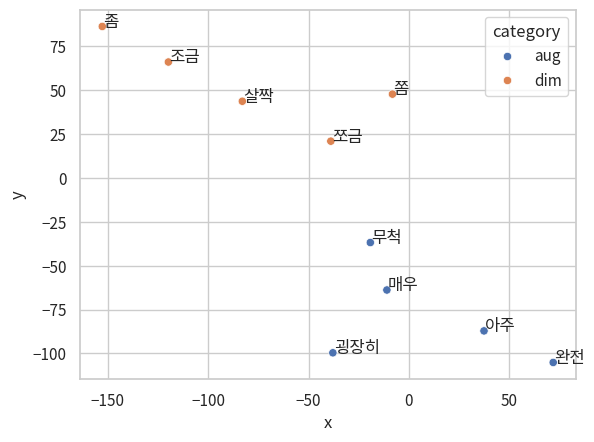

In [18]:
sns.set_theme(font='Source Han Sans K',style='whitegrid')

ax = sns.scatterplot(x='x', y='y', data=matrix2d) # EDIT THIS LINE

for index, row in matrix2d.iterrows():
    ax.text(row['x']+.5, row['y'], index)

ax